# Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import math
import gc
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from pandas.core.internals.managers import BaseBlockManager
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
!pip install fastai==2.2.7
!pip install -Uqq fastbook
!pip install optuna
!pip install imbalanced-learn

  Using cached fastai-2.2.7-py3-none-any.whl (193 kB)
  Attempting uninstall: fastai
    Found existing installation: fastai 2.6.0
    Uninstalling fastai-2.6.0:
      Successfully uninstalled fastai-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastbook 0.0.21 requires fastai>=2.6, but you have fastai 2.2.7 which is incompatible.


In [ ]:
from fastai import *
from fastai.vision import *
from fastai.tabular.all import *
import fastbook
import optuna
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Data preperation

In this section we use some code and methods created by Dovydas Sprindys, available at: https://github.com/dsp0011/DAT255-project

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Load data

In [ ]:
reduced_path = 'drive/MyDrive/Dat255 reduced files/'

diboson     = pd.read_pickle(reduced_path +'diboson.pkl')
DYee     = pd.read_pickle(reduced_path +'DYee.pkl')
DYmumu     = pd.read_pickle( reduced_path  + 'DYmumu.pkl')
DYtautau    = pd.read_pickle( reduced_path  + 'DYtautau.pkl')
ttbar_lep     = pd.read_pickle( reduced_path  + 'ttbar_lep.pkl')
Wenu     = pd.read_pickle( reduced_path  + 'Wenu.pkl')
Wmunu     = pd.read_pickle( reduced_path  + 'Wmunu.pkl')
Wtaunu     = pd.read_pickle( reduced_path  + 'Wtaunu.pkl')
Zee     = pd.read_pickle( reduced_path  + 'Zee.pkl')
ttbar_had     = pd.read_pickle( reduced_path  + 'ttbar_had.pkl')
Ztautau     = pd.read_pickle( reduced_path  + 'Ztautau.pkl')
signal     = pd.read_pickle(reduced_path  + 'signal.pkl')


In [ ]:
diboson     = diboson.loc[:,~diboson.columns.duplicated()]
DYee        = DYee.loc[:,~DYee.columns.duplicated()]
DYmumu      = DYmumu.loc[:,~DYmumu.columns.duplicated()]
DYtautau    = DYtautau.loc[:,~DYtautau.columns.duplicated()]
ttbar_lep   = ttbar_lep.loc[:,~ttbar_lep.columns.duplicated()]
Wenu        = Wenu.loc[:,~Wenu.columns.duplicated()]
Wmunu       = Wmunu.loc[:,~Wmunu.columns.duplicated()]
Wtaunu      = Wtaunu.loc[:,~Wtaunu.columns.duplicated()]
Zee         = Zee.loc[:,~Zee.columns.duplicated()]
ttbar_had   = ttbar_had.loc[:,~ttbar_had.columns.duplicated()]
Ztautau     = Ztautau.loc[:,~Ztautau.columns.duplicated()]
signal      = signal.loc[:,~signal.columns.duplicated()]

In [ ]:
diboson = shuffle(diboson, random_state = 42)
DYee = shuffle(DYee, random_state = 42)
DYmumu = shuffle(DYmumu, random_state = 42)
DYtautau = shuffle(DYtautau, random_state = 42)
ttbar_lep = shuffle(ttbar_lep, random_state = 42)
Wenu = shuffle(Wenu, random_state = 42)
Wmunu = shuffle(Wmunu, random_state = 42)
Wtaunu = shuffle(Wtaunu, random_state = 42)
Zee = shuffle(Zee, random_state = 42)
ttbar_had = shuffle(ttbar_had, random_state = 42)
Ztautau = shuffle(Ztautau, random_state = 42)
signal = shuffle(signal, random_state = 42)

In [ ]:
background = [diboson, DYee, DYmumu, DYtautau, ttbar_lep, Wenu, Wmunu, Wtaunu, Zee, ttbar_had, Ztautau]
backgroundLabel = ['diboson', 'DYee', 'DYmumu', 'DYtautau', 'ttbar_lep', 'Wenu', 'Wmunu', 'Wtaunu', 'Zee', 'ttbar_had', 'Ztautau']

In [ ]:
del Zee
del ttbar_lep
del DYmumu
del DYee
del diboson
del Wenu
del Ztautau
gc.collect()

152

In [ ]:
features_from_feature_importance = [
                                    "met_et",
                                    "lep_1_E",
                                    "lep_2_E",
                                    "lep_3_E",
                                    "lep_1_eta",
                                    "lep_2_eta",
                                    "jet_n",
                                    "lep_1_pt",
                                    "lep_2_pt",
                                    "lep_3_pt",
                                    "lep_4_pt",
                                    "lep_5_pt",
                                    "lep_1_phi",
                                    "lep_2_phi",
                                    "jet_2_trueflav",
                                    "jet_1_E",
                                    "jet_3_E",
                                    "jet_1_pt",
                                    "jet_2_pt",
                                    "jet_3_pt",
                                    "jet_4_pt",
                                    "jet_5_pt",
                                    "jet_6_pt",
                                    "jet_7_pt",
                                    "jet_8_pt",
                                    "jet_9_pt",
                                    "alljet_n",
                                    "lep_1_etcone20",
                                    "jet_2_MV1",
                                    "jet_1_MV1",
                                    "jet_1_phi",
                                    "jet_1_m",
                                    "jet_2_E",
                                    "jet_2_jvf",
                                    "jet_1_SV0",
                                    ]


In [ ]:
invariant_features = [ 'lep_1_pt',
                       'lep_1_eta',
                       'lep_1_phi',
                       'lep_1_type',
                       'lep_1_charge',
                       'lep_1_E',
                       'lep_2_pt',
                       'lep_2_eta',
                       'lep_2_phi',
                       'lep_2_type',
                       'lep_2_charge',
                       'lep_2_E',
                       'jet_1_pt',
                       'jet_1_eta',
                       'jet_1_phi',
                       'jet_2_pt',
                       'jet_2_eta',
                       'jet_2_phi',
          
] 

In [ ]:
features_and_weights = list(set(features_from_feature_importance + invariant_features))
features = features_and_weights

In [ ]:
for i in range(0,11):
  background[i]['data_type'] = 0

signal['data_type'] = 1

features.append('data_type')

In [ ]:
def train_valid_test_split(df, test_pct, valid_pct):
  number_of_train_valid_rows = math.floor(df.shape[0] * (1 - test_pct))
  df_train_valid ,df_test = df.iloc[:number_of_train_valid_rows].copy(),df.iloc[number_of_train_valid_rows:].copy() 

  number_of_train_rows = math.floor(df_train_valid.shape[0] * (1 - valid_pct))
  df_train, df_valid = df_train_valid.iloc[:number_of_train_rows].copy(),df_train_valid.iloc[number_of_train_rows:].copy() 

  return df_train, df_valid, df_test

In [ ]:
background_train = [None]*len(background)
background_valid = [None]*len(background)
background_test = [None]*len(background)
background_train_valid = [None]*len(background)


for i in range(len(background)):
  background[i].reset_index()
  background_train[i], background_valid[i], background_test[i] = train_valid_test_split(background[i], 0.6, 0.3)
  background_train_valid[i] = pd.concat([background_train[i][features], background_valid[i][features]])


signal.reset_index()
signal_train, signal_valid, signal_test = train_valid_test_split(signal, 0.6, 0.3)
signal_train_valid = pd.concat([signal_train[features], signal_valid[features]])

In [ ]:
df_train_valid = pd.concat(
    [background_train_valid[0][features],
    background_train_valid[1][features],
    background_train_valid[2][features],
    background_train_valid[3][features],
    background_train_valid[4][features],
    background_train_valid[5][features],
    background_train_valid[6][features],
    background_train_valid[7][features],
    background_train_valid[8][features],
    background_train_valid[9][features],
    background_train_valid[10][features],
    signal_train_valid[features]]
)

df_test =  pd.concat(
    [background_test[0][features],
    background_test[1][features],
    background_test[2][features],
    background_test[3][features],
    background_test[4][features],
    background_test[5][features],
    background_test[6][features],
    background_test[7][features],
    background_test[8][features],
    background_test[9][features],
    background_test[10][features],
    signal_test[features]]
)
features.remove('data_type')

df_train_valid.head()

,jet_2_pt,jet_1_pt,jet_1_m,jet_2_trueflav,lep_1_pt,lep_1_E,lep_2_eta,lep_3_pt,jet_7_pt,jet_8_pt,lep_1_type,lep_2_E,lep_5_pt,jet_9_pt,jet_2_MV1,lep_1_charge,lep_2_pt,lep_1_etcone20,met_et,lep_2_type,lep_4_pt,lep_2_phi,jet_1_MV1,jet_1_eta,jet_2_phi,jet_3_E,jet_2_E,jet_4_pt,jet_1_SV0,jet_1_E,lep_1_phi,jet_6_pt,jet_2_jvf,jet_3_pt,lep_2_charge,jet_n,lep_3_E,alljet_n,jet_5_pt,jet_1_phi,lep_1_eta,jet_2_eta,data_type
240286,30879.878906,33441.281250,7919.706543,0,70003.000000,348217.000000,-2.130840,8629.559570,25541.931641,33199.382812,1093664768,115714.359375,0.000000,28467.660156,0.079650,1.0,27097.236328,5068.668945,55996.164062,1093664768,6525.303711,-2.306713,0.052393,-1.941789,1.090446,47961.550781,32141.175781,26121.238281,0.0,119224.953125,-1.213312,45196.339844,0.125757,26031.917969,-1.0,0,8684.016602,2,34480.773438,-0.804263,-2.287175,0.142964,0
207218,27618.810547,30077.277344,7208.302734,0,30512.605469,44602.898438,-1.183226,8960.332031,28368.611328,28183.841797,1095761920,41888.015625,5811.579102,29435.957031,0.052430,1.0,23458.849609,3834.954102,118807.289062,1095761920,7584.737305,-0.623021,0.072071,-0.727234,-3.112565,63501.785156,116181.929688,30163.722656,0.0,39058.433594,2.829271,32688.576172,0.000000,49128.859375,-1.0,0,36264.140625,2,25285.927734,2.041985,0.927426,-2.113898,0
472462,27344.414062,87791.968750,8251.632812,0,53562.710938,173877.437500,-0.188837,13088.007812,34387.996094,37325.753906,1093664768,39415.007812,5811.579102,25570.933594,0.065073,1.0,38722.542969,2677.109619,19069.587891,1093664768,8006.556641,-0.406874,0.059250,-0.493717,-1.825780,68773.531250,28023.609375,27249.386719,0.0,99055.304688,-0.768676,25123.806641,0.627259,27721.800781,-1.0,2,14987.274414,2,25856.562500,2.601746,-1.846030,-0.154416,0
406303,26448.152344,37831.085938,4548.416992,0,34513.105469,134574.562500,-1.420998,5538.585449,25112.246094,40322.410156,1093664768,58394.460938,0.000000,27481.082031,0.060030,-1.0,26647.511719,1014.726074,45231.429688,1095761920,6525.303711,-2.561293,0.052394,-2.246183,0.098625,161694.375000,72514.648438,45281.300781,0.0,180840.546875,1.439510,27113.009766,0.330295,48873.527344,1.0,0,5772.819336,2,32164.453125,2.781263,-2.037062,-1.663638,0
410098,30810.994141,78189.750000,7905.195801,0,31711.708984,31890.738281,0.984481,5230.188965,25112.246094,40322.410156,1093664768,43773.351562,0.000000,27481.082031,0.079338,-1.0,28703.320312,684.060364,92281.617188,1093664768,6525.303711,-0.260665,0.788124,1.624896,0.337034,37674.605469,132630.218750,27023.474609,0.0,206369.953125,-2.579971,30533.644531,0.921855,32662.816406,1.0,2,9529.125977,2,27381.302734,-1.097664,0.106209,2.138418,0


In [ ]:
print("Percentage of signal in training set: ", df_train_valid['data_type'].value_counts()[1]/(df_train_valid['data_type'].value_counts()[1]+df_train_valid['data_type'].value_counts()[0])*100)
print("Percentage of signal in test set: ", df_test['data_type'].value_counts()[1]/(df_test['data_type'].value_counts()[1]+df_test['data_type'].value_counts()[0])*100)

Percentage of signal in training set:  1.9767513054430634
Percentage of signal in test set:  1.9767455421180917


## Detect missing data

Since the data is simulated, the (reduced) dataset contains no missing values, and we can use it directly in our random forest without imputing or removing values

In [ ]:
df_train_valid.isnull().sum()

jet_2_pt          0
jet_1_pt          0
jet_1_m           0
jet_2_trueflav    0
lep_1_pt          0
lep_1_E           0
lep_2_eta         0
lep_3_pt          0
jet_7_pt          0
jet_8_pt          0
lep_1_type        0
lep_2_E           0
lep_5_pt          0
jet_9_pt          0
jet_2_MV1         0
lep_1_charge      0
lep_2_pt          0
lep_1_etcone20    0
met_et            0
lep_2_type        0
lep_4_pt          0
lep_2_phi         0
jet_1_MV1         0
jet_1_eta         0
jet_2_phi         0
jet_3_E           0
jet_2_E           0
jet_4_pt          0
jet_1_SV0         0
jet_1_E           0
lep_1_phi         0
jet_6_pt          0
jet_2_jvf         0
jet_3_pt          0
lep_2_charge      0
jet_n             0
lep_3_E           0
alljet_n          0
jet_5_pt          0
jet_1_phi         0
lep_1_eta         0
jet_2_eta         0
data_type         0
dtype: int64

## Data balance

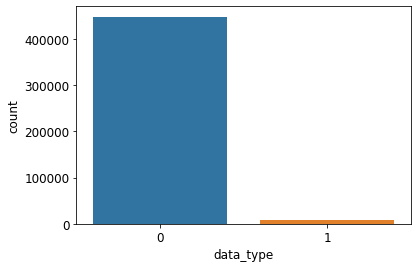

In [ ]:
sns.countplot(x = 'data_type', data=df_train_valid)

## Data normalization

In [ ]:
#Normalizing the train_valid dataset
[df_train_valid[col].update((df_train_valid[col] - df_train_valid[col].min()) / (df_train_valid[col].max() - df_train_valid[col].min())) for col in df_train_valid[features].columns]
print("")

In [ ]:
#Normalizing the test dataset
[df_test[col].update((df_test[col] - df_test[col].min()) / (df_test[col].max() - df_test[col].min())) for col in df_test[features].columns]
print("")

# Modelling

In [ ]:
fixed_seed = 42
set_seed(fixed_seed, True)

def set_fixed_seed(dls, fixed_seed):
  set_seed(fixed_seed,True)
  dls.rng.seed(fixed_seed)

We use an index plitter to make the training and validation sets. Therefore we need to shuffle the dataframe and we need to make sure that both sets contain an equal amount of signal, more or less. 

We do this because we want to do over- and undersampling later on, and we need to be user we're only changing the training set, not the validation set. 

In [ ]:
df_train_valid = df_train_valid.sample(frac=1, random_state=fixed_seed).reset_index(drop=True)
df_train_valid["data_type"] = df_train_valid["data_type"].astype("category")

def get_val_idx(df, valid_pct):
  row_cutoff = math.ceil(df.shape[0] * (valid_pct))
  return list(range(0, row_cutoff))

indexes = get_val_idx(df_train_valid, 0.4)
print("Percentage of signal in training set: ", df_train_valid[indexes[-1]:]['data_type'].value_counts()[1]/(df_train_valid[indexes[-1]:]['data_type'].value_counts()[1]+df_train_valid[indexes[-1]:]['data_type'].value_counts()[0])*100)
print("Percentage of signal in validation set: ", df_train_valid[:indexes[-1]]['data_type'].value_counts()[1]/(df_train_valid[:indexes[-1]]['data_type'].value_counts()[1]+df_train_valid[:indexes[-1]]['data_type'].value_counts()[0])*100)

Percentage of signal in training set:  1.9734684208608184
Percentage of signal in validation set:  1.9816756502629478


In [ ]:
def make_tabular_pandas(df, indexes):
  to = TabularPandas(df,
                   cont_names = features,
                   y_names='data_type',
                   splits=IndexSplitter(indexes)(range_of(df)),
                   y_block = CategoryBlock())
  return to

def make_dataloader(to, fixed_seed):
  dls = to.dataloaders(bs=1024)
  set_fixed_seed(dls, fixed_seed)
  return dls

## Baseline model

As we want to compare the baseline to the later deep learning architectures, we need to be sure we're using the same training and validation set. We do this by extracting the sets from the tabular learner object as shown below. 

In [ ]:
to = TabularPandas(df_train_valid,
                   cont_names = features_from_feature_importance,
                   y_names='data_type',
                   splits=IndexSplitter(indexes)(range_of(df_train_valid)), 
                   y_block = CategoryBlock())

In [ ]:
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_val, y_val = to.valid.xs, to.valid.ys.values.ravel()

In [ ]:
m2 = RandomForestClassifier(random_state=fixed_seed)
m2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
preds = m2.predict(X_val)

In [ ]:
print("Accuracy:",accuracy_score(y_val, preds))

Accuracy: 0.9953478710086537


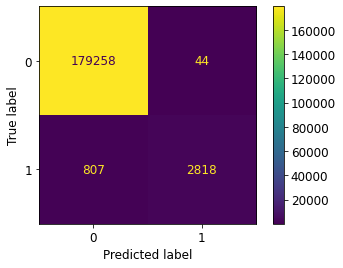

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf = confusion_matrix(y_val, preds)
conf_matrix = ConfusionMatrixDisplay(conf)
conf_matrix.plot()
plt.show()

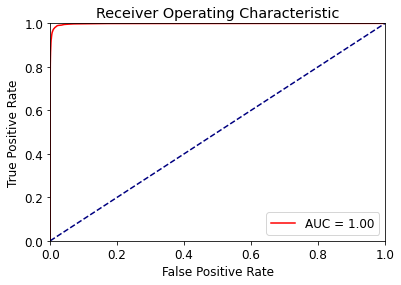

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

probs = m2.predict_proba(X_val)
preds = probs[:,0]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],color='navy', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<Figure size 432x288 with 0 Axes>

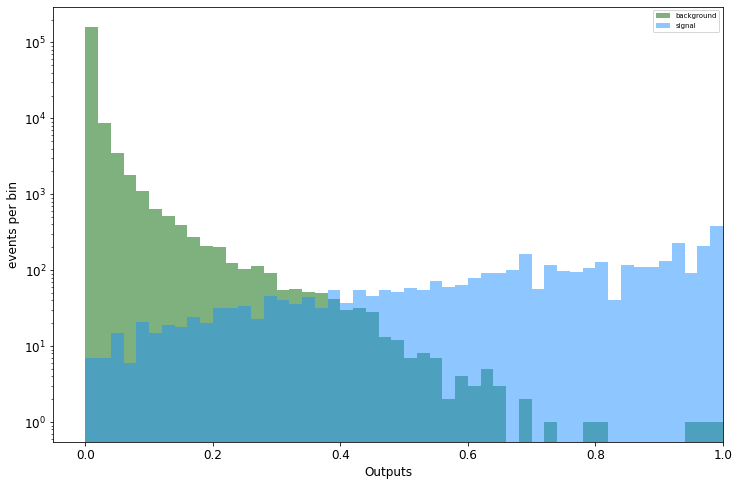

In [ ]:
# Plotting the data
plt.clf()
plt.figure(figsize=(12,8))

signal_pred = []
background_pred = []

probs = m2.predict_proba(X_val)
preds = probs[:,1]

X_val_plot = X_val.copy()
X_val_plot["data_type"] = y_val
X_val_plot["predicted"] = preds

predicted_background = X_val_plot.loc[X_val_plot['data_type'] == 0, 'predicted']
predicted_signal = X_val_plot.loc[X_val_plot['data_type'] == 1, 'predicted']

#histBins=np.histogram(np.hstack([*background_predict[0],*preds.numpy()]), bins=50)[1]

plt.hist( predicted_background, bins=50, color='darkgreen', stacked=True, label='background', alpha=0.5)
plt.hist( predicted_signal, bins=50, color='dodgerblue', stacked=True, label='signal', alpha=0.5)

plt.legend(loc='best', prop={'size': 7})
plt.xlabel('Outputs')
plt.ylabel('events per bin')
plt.yscale('log')
plt.xlim(right=1)
plt.show()

In [ ]:
del to

## Neural Networks

In [ ]:
# plotting functions for NN

def plot_confusion_matrix(y_true, y_pred_binary):
  conf = confusion_matrix(y_true, y_pred_binary)
  conf_matrix = ConfusionMatrixDisplay(conf)
  conf_matrix.plot()
  plt.show()

def plot_ROC_curve(y_true, y_pred):
  fpr, tpr, thresholds = roc_curve(y_true, y_pred)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.show()

def plot_signal_background(y_true, y_pred):
  plt.clf()
  plt.figure(figsize=(12,8))
  
  X_val_plot = x_val_nn.copy()
  X_val_plot["data_type"] = y_true
  X_val_plot["predicted"] = y_pred

  predicted_background = X_val_plot.loc[X_val_plot['data_type'] == 0, 'predicted']
  predicted_signal = X_val_plot.loc[X_val_plot['data_type'] == 1, 'predicted']

  plt.hist( predicted_background, bins=50, color='darkgreen', stacked=True, label='background', alpha=0.5)
  plt.hist( predicted_signal, bins=40, color='dodgerblue', stacked=True, label='signal', alpha=0.5)

  plt.legend(loc='best', prop={'size': 7})
  plt.xlabel('Outputs')
  plt.ylabel('events per bin')
  plt.yscale('log')
  plt.xlim(left=min(min(predicted_background), min(predicted_signal)), right=max(max(predicted_background), max(predicted_signal)))
  plt.show()

### Basic tabular learner

In [ ]:
f1 = F1Score()
recall = Recall()
precision = Precision()

to = make_tabular_pandas(df_train_valid, indexes)
dls = make_dataloader(to, fixed_seed)
learn = tabular_learner(dls, metrics=[accuracy, f1, recall, precision], y_range=[0,1], cbs=ShowGraphCallback())

epoch,train_loss,valid_loss,accuracy,f1_score,recall_score,precision_score,time
0,0.548550,0.495180,0.864399,0.219650,0.963034,0.123961,00:09
1,0.351264,0.331934,0.988017,0.658886,0.584000,0.755801,00:09
2,0.325461,0.324578,0.989116,0.671072,0.560276,0.836491,00:10
3,0.324578,0.324157,0.988925,0.687827,0.615724,0.779058,00:09
4,0.324294,0.323696,0.989482,0.666898,0.531310,0.895397,00:11
5,0.324194,0.323546,0.989438,0.670532,0.542345,0.878071,00:09
6,0.323496,0.323685,0.989362,0.664367,0.531310,0.886332,00:09
7,0.323496,0.323478,0.989548,0.681546,0.564414,0.860025,00:09
8,0.323602,0.323410,0.989581,0.681697,0.563034,0.863733,00:09
9,0.323645,0.323497,0.989619,0.674773,0.543448,0.889792,00:09


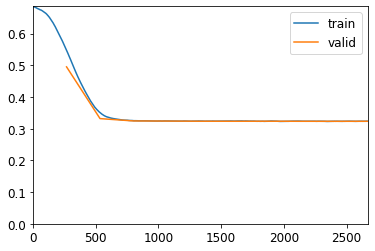

In [ ]:
learn.fit_one_cycle(10)

We can see that the model doesn't seem to imporve with more training. 

In [ ]:
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
x_val_nn, v_val_nn = to.valid.xs, to.valid.ys.values.ravel()

In [ ]:
test_dl = learn.dls.test_dl(df_train_valid[:indexes[-1]+1])
predicted_df_nn, targs =  learn.get_preds(dl = test_dl)

In [ ]:
def get_predictions_int(predictions):
  predicted = []
  for i in predictions:
    if i[0] > i[1]:
      predicted.append(0)
    else:
      predicted.append(1)
  return predicted

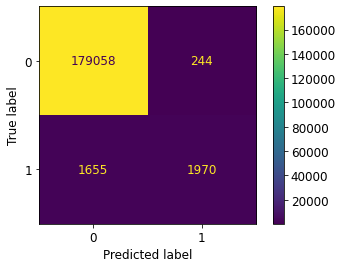

In [ ]:
predicted = get_predictions_int(predicted_df_nn)
plot_confusion_matrix(v_val_nn, predicted)

<Figure size 432x288 with 0 Axes>

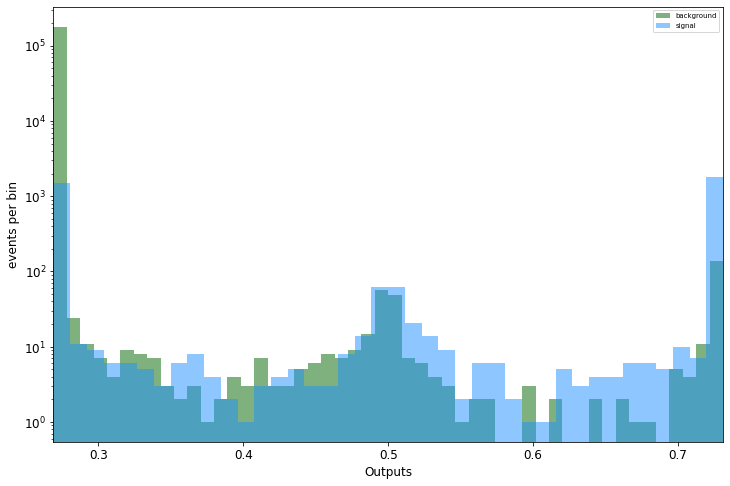

In [ ]:
probs = predicted_df_nn
preds = probs[:,1]

plot_signal_background(v_val_nn, preds)

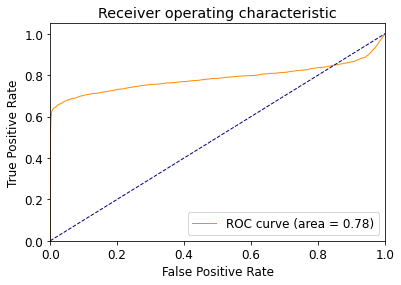

In [ ]:
plot_ROC_curve(v_val_nn, preds)

In [ ]:
del to
del learn
del dls
gc.collect()

22302

### Tabular learner with optuna optimization

From previous trials we found that more layers gave lower validation loss, but due to time restrictions and precessing costs we limited the number of hidden layers in the architecture to 5. 
Not run in this version due to time constraints.

In [ ]:
to = make_tabular_pandas(df_train_valid, indexes)
dls = make_dataloader(to, fixed_seed)

In [ ]:
def objective(trial: optuna.Trial):
    n_layers = 5
    layers = [] 
    for i in range(n_layers - 1):  #TabularModel adds the last layer.
        num_units = trial.suggest_categorical(f'num_units_layer_{i}', [800, 1000, 1200])
        layers.append(num_units)
        
    emb_szs = trial.suggest_discrete_uniform('emb_szs', 0, 1, 0.1)
    learn = tabular_learner(dls, layers=layers, emb_szs=emb_szs,  metrics=[accuracy, f1, recall, precision], y_range=[0,1])
    
    learn.fit_one_cycle(5)
    return learn.validate()[0] # or use the last record of `learn.recorder`.

# skip due to time requirements 
#study = optuna.create_study()
#study.optimize(objective)
#best_trial = study.best_trial

The study showed that the best outcome (measured by validation loss) is using layers 800, 1000, 1200 + the final layer the tabluar model applies, and embedding size of 0.1 

In [ ]:
to = make_tabular_pandas(df_train_valid, indexes)
dls = make_dataloader(to, fixed_seed)
learn = tabular_learner(dls, metrics=[accuracy, f1, recall, precision], layers=[800, 1000, 1200], emb_szs=0.1, y_range=[0,1], cbs=ShowGraphCallback())

epoch,train_loss,valid_loss,accuracy,f1_score,recall_score,precision_score,time
0,0.384686,0.352855,0.958300,0.424128,0.774897,0.291965,02:26
1,0.327938,0.325572,0.988083,0.625687,0.502621,0.828558,02:24
2,0.325026,0.324334,0.988755,0.670511,0.577379,0.799465,02:25
3,0.325030,0.324316,0.988832,0.670218,0.572690,0.807782,02:24
4,0.325041,0.324091,0.989001,0.641099,0.495724,0.907118,02:25
5,0.324615,0.323904,0.989187,0.655880,0.520000,0.887894,02:24
6,0.324007,0.323789,0.989176,0.677104,0.572690,0.828081,02:24
7,0.323872,0.323822,0.989389,0.679014,0.566345,0.847647,02:26
8,0.324184,0.323658,0.989411,0.672417,0.548414,0.868881,02:25
9,0.324140,0.323653,0.989318,0.653792,0.508966,0.913819,02:25


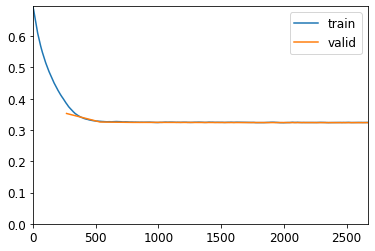

In [ ]:
learn.fit_one_cycle(10)

In [ ]:
del to
del learn
del dls
gc.collect()

7583

### Oversampling

In [ ]:
sampling_strategies = ["minority", "not minority", "all"]

valid = df_train_valid[:indexes[-1]].copy()
x = df_train_valid[indexes[-1]:].copy()
y = x["data_type"]
x.drop(["data_type"], axis=1)

def oversample_data(sampling_strategy, x, y):
  oversample = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=fixed_seed)
  X_over, y_over = oversample.fit_resample(x, y)

  X_over["data_type"] = y_over
  df_train_valid_oversampled = X_over

  df_train_valid_oversampled = pd.concat([valid, df_train_valid_oversampled], ignore_index=True)
  return df_train_valid_oversampled

for sampling_strategy in sampling_strategies:
  print("Oversampling using ", str(sampling_strategy), "strategy.")
  df_train_valid_oversampled = oversample_data(sampling_strategy, x, y)
  to = make_tabular_pandas(df_train_valid_oversampled, indexes)
  dls = make_dataloader(to, fixed_seed)
  learn = tabular_learner(dls, metrics=[accuracy, f1, recall, precision], y_range=[0,1])

  learn.fit_one_cycle(5)

  del to
  del learn
  del dls
  gc.collect()

Oversampling using  minority strategy.


epoch,train_loss,valid_loss,accuracy,f1_score,recall_score,precision_score,time
0,0.370001,0.397374,0.913293,0.303701,0.954207,0.180589,00:15
1,0.349406,0.365526,0.945864,0.396416,0.897103,0.254420,00:15
2,0.331825,0.339875,0.972546,0.563000,0.892414,0.411211,00:16
3,0.326984,0.333672,0.979035,0.624351,0.879172,0.484052,00:28
4,0.325033,0.332133,0.980495,0.639814,0.874207,0.504537,00:15


Oversampling using  not minority strategy.


epoch,train_loss,valid_loss,accuracy,f1_score,recall_score,precision_score,time
0,0.452113,0.382528,0.955135,0.409611,0.785379,0.277053,00:08
1,0.329096,0.326185,0.989007,0.668425,0.559172,0.830738,00:09
2,0.324514,0.324126,0.989411,0.669736,0.541793,0.876786,00:08
3,0.324166,0.323603,0.989542,0.678541,0.556966,0.868014,00:08
4,0.323984,0.323588,0.989542,0.671475,0.539310,0.889445,00:09


Oversampling using  all strategy.


epoch,train_loss,valid_loss,accuracy,f1_score,recall_score,precision_score,time
0,0.370001,0.397374,0.913293,0.303701,0.954207,0.180589,00:16
1,0.349406,0.365526,0.945864,0.396416,0.897103,0.254420,00:16
2,0.331825,0.339875,0.972546,0.563000,0.892414,0.411211,00:16
3,0.326984,0.333672,0.979035,0.624351,0.879172,0.484052,00:16
4,0.325033,0.332133,0.980495,0.639814,0.874207,0.504537,00:17


The best result of the above tests was oversampling the majority class only.

In [ ]:
df_train_valid_oversampled = oversample_data("not minority", x, y)
to = make_tabular_pandas(df_train_valid_oversampled, indexes)
dls = make_dataloader(to, fixed_seed)
learn = tabular_learner(dls, metrics=[accuracy, f1, recall, precision], y_range=[0,1])

learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,f1_score,recall_score,precision_score,time
0,0.548550,0.495180,0.864399,0.219650,0.963034,0.123961,00:09
1,0.351264,0.331934,0.988017,0.658886,0.584000,0.755801,00:09
2,0.325461,0.324578,0.989116,0.671072,0.560276,0.836491,00:09
3,0.324578,0.324157,0.988925,0.687827,0.615724,0.779058,00:09
4,0.324294,0.323696,0.989482,0.666898,0.531310,0.895397,00:09
5,0.324194,0.323546,0.989438,0.670532,0.542345,0.878071,00:09
6,0.323496,0.323685,0.989362,0.664367,0.531310,0.886332,00:09
7,0.323496,0.323478,0.989548,0.681546,0.564414,0.860025,00:09
8,0.323602,0.323410,0.989581,0.681697,0.563034,0.863733,00:09
9,0.323645,0.323497,0.989619,0.674773,0.543448,0.889792,00:08


In [ ]:
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
x_val_nn, v_val_nn = to.valid.xs, to.valid.ys.values.ravel()

test_dl = learn.dls.test_dl(df_train_valid[:indexes[-1]+1])
predicted_df_nn, targs =  learn.get_preds(dl = test_dl)

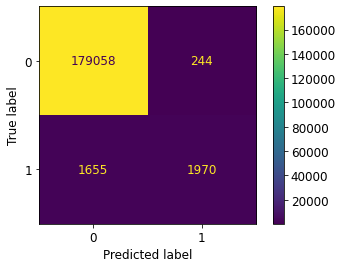

In [ ]:
predicted = get_predictions_int(predicted_df_nn)
plot_confusion_matrix(v_val_nn, predicted)

Oversampling the majority class (background) gave slightly higher accuracy then the base NN learner, but still not as good as the baseline random forest model. 

In [ ]:
del to
del learn
del dls
gc.collect()

3860

### Undersampling

We also tried different strategies for undersampling

In [ ]:
sampling_strategies = ["not minority", "not majority", "all"]

valid = df_train_valid[:indexes[-1]].copy()
x = df_train_valid[indexes[-1]:].copy()
y = x["data_type"]
x.drop(["data_type"], axis=1)

def undersample_data(sampling_strategy, x, y):
  undersample = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=fixed_seed)
  X_over, y_over = undersample.fit_resample(x, y)
  X_over["data_type"] = y_over
  df_train_valid_undersampled = X_over
  df_train_valid_undersampled = pd.concat([valid, df_train_valid_undersampled], ignore_index=True)
  return df_train_valid_undersampled

for sampling_strategy in sampling_strategies:
  df_train_valid_undersampled = undersample_data(sampling_strategy, x, y)
  to = make_tabular_pandas(df_train_valid_undersampled, indexes)
  dls = make_dataloader(to, fixed_seed)
  learn = tabular_learner(dls, metrics=[accuracy, f1, recall, precision], y_range=[0,1])
  learn.fit_one_cycle(5)

  del to
  del learn
  del dls
  gc.collect()

epoch,train_loss,valid_loss,accuracy,f1_score,recall_score,precision_score,time
0,0.625234,0.670122,0.889962,0.204607,0.714207,0.119408,00:02
1,0.545840,0.590058,0.856708,0.205745,0.936552,0.115567,00:02
2,0.498476,0.513834,0.851159,0.203772,0.961103,0.113968,00:02
3,0.470595,0.466868,0.870806,0.227654,0.960828,0.129124,00:02
4,0.453146,0.439068,0.888103,0.252165,0.952000,0.145330,00:02


epoch,train_loss,valid_loss,accuracy,f1_score,recall_score,precision_score,time
0,0.452140,0.385267,0.947575,0.381210,0.814897,0.248800,00:09
1,0.329201,0.325812,0.988963,0.686539,0.609931,0.785156,00:09
2,0.324552,0.324355,0.989067,0.644128,0.499310,0.907268,00:08
3,0.323787,0.323674,0.989537,0.669544,0.534897,0.894785,00:09
4,0.324200,0.323661,0.989449,0.663294,0.524414,0.902231,00:09


epoch,train_loss,valid_loss,accuracy,f1_score,recall_score,precision_score,time
0,0.625664,0.669820,0.893482,0.208152,0.706483,0.122057,00:02
1,0.546013,0.589575,0.859004,0.208300,0.936000,0.117190,00:02
2,0.498379,0.514177,0.851372,0.203912,0.960552,0.114063,00:02
3,0.470531,0.467242,0.870555,0.227262,0.960552,0.128877,00:02
4,0.453024,0.438603,0.888628,0.252778,0.950621,0.145770,00:02


Best strategy for undersampling was undersampling "not majority", that means undersampling the signal class. Results are similar to oversampling the background class. We can look at the confusion matrix for this as well, after training for a few more cycles.

In [ ]:
df_train_valid_undersampled = undersample_data("not majority", x, y)
to = make_tabular_pandas(df_train_valid_undersampled, indexes)
dls = make_dataloader(to, fixed_seed)
learn = tabular_learner(dls, metrics=[accuracy, f1, recall, precision], y_range=[0,1])
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,f1_score,recall_score,precision_score,time
0,0.547810,0.497284,0.862552,0.217339,0.963034,0.122491,00:09
1,0.352088,0.333854,0.986962,0.657377,0.631172,0.685851,00:09
2,0.325696,0.324587,0.989154,0.670869,0.557793,0.841448,00:09
3,0.324187,0.324296,0.988864,0.630107,0.478621,0.921892,00:09
4,0.324566,0.324018,0.989083,0.647485,0.505931,0.899020,00:09
5,0.324155,0.323495,0.989624,0.684088,0.566897,0.862358,00:09
6,0.323919,0.323599,0.989471,0.668160,0.534897,0.889858,00:09
7,0.323644,0.323487,0.989564,0.678132,0.554759,0.872073,00:09
8,0.323594,0.323453,0.989668,0.680527,0.555310,0.878656,00:09
9,0.323221,0.323454,0.989613,0.676761,0.548690,0.882823,00:10


In [ ]:
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
x_val_nn, v_val_nn = to.valid.xs, to.valid.ys.values.ravel()

test_dl = learn.dls.test_dl(df_train_valid[:indexes[-1]+1])
predicted_df_nn, targs =  learn.get_preds(dl = test_dl)

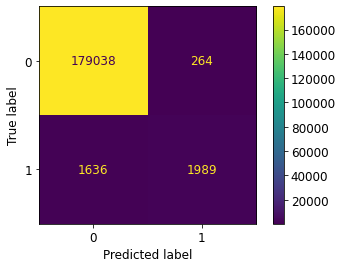

In [ ]:
predicted = get_predictions_int(predicted_df_nn)
plot_confusion_matrix(v_val_nn, predicted)

In [ ]:
del to
del learn
del dls
gc.collect()

3857

### Using different loss functions

We cna also see how using differen loss functions will affect the accuracy. Here we're trying cross entropy loss, focal loss, and label smoothing cross enthropy. 

In [ ]:
loss_functions= [CrossEntropyLossFlat(), FocalLossFlat(), LabelSmoothingCrossEntropyFlat()]

Training using FlattenedLoss of CrossEntropyLoss()


epoch,train_loss,valid_loss,accuracy,f1_score,recall_score,precision_score,time
0,0.452113,0.382528,0.955135,0.409611,0.785379,0.277053,00:09
1,0.329096,0.326185,0.989007,0.668425,0.559172,0.830738,00:09
2,0.324514,0.324126,0.989411,0.669736,0.541793,0.876786,00:09
3,0.324166,0.323603,0.989542,0.678541,0.556966,0.868014,00:09
4,0.323984,0.323588,0.989542,0.671475,0.539310,0.889445,00:09


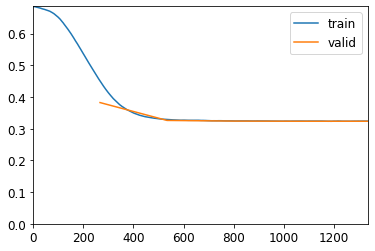

Training using FlattenedLoss of FocalLoss()


epoch,train_loss,valid_loss,accuracy,f1_score,recall_score,precision_score,time
0,0.081930,0.055370,0.939369,0.350682,0.826207,0.222577,00:09
1,0.031667,0.029913,0.989242,0.663244,0.534621,0.873366,00:09
2,0.029208,0.029062,0.989362,0.666895,0.537379,0.878665,00:09
3,0.028999,0.028797,0.989553,0.677468,0.553655,0.872609,00:09
4,0.028851,0.028796,0.989570,0.673623,0.543172,0.886538,00:09


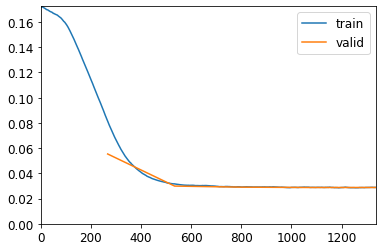

Training using FlattenedLoss of LabelSmoothingCrossEntropy()


epoch,train_loss,valid_loss,accuracy,f1_score,recall_score,precision_score,time
0,0.484404,0.424997,0.950767,0.393208,0.804966,0.260141,00:09
1,0.377405,0.374549,0.988788,0.653020,0.532414,0.844269,00:09
2,0.373409,0.372966,0.989345,0.674570,0.557241,0.854484,00:09
3,0.372995,0.372520,0.989520,0.675360,0.550069,0.874561,00:09
4,0.372871,0.372582,0.989526,0.666435,0.528000,0.903256,00:09


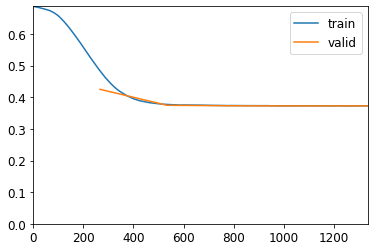

In [ ]:
for loss_func in loss_functions:
  to = make_tabular_pandas(df_train_valid, indexes)
  dls = make_dataloader(to, fixed_seed) 
  learn = tabular_learner(dls, loss_func=loss_func, metrics=[accuracy, f1, recall, precision], y_range=[0,1], cbs=ShowGraphCallback())
  print("Training using", str(loss_func))
  learn.fit_one_cycle(5)
  del to
  del learn
  del dls
  gc.collect()

## Best of all combo 
combining the best features of the above categories to see if we achieve a better result

In [ ]:
df_train_valid_oversampled = oversample_data("not minority", x, y)
to = make_tabular_pandas(df_train_valid_oversampled, indexes)
dls = make_dataloader(to, fixed_seed)
learn = tabular_learner(dls, 
                        metrics=[accuracy, f1, recall, precision], 
                        loss_func=LabelSmoothingCrossEntropyFlat(), 
                        layers=[800, 1000, 1200], 
                        emb_szs=0.1, y_range=[0,1], 
                        cbs=ShowGraphCallback())

epoch,train_loss,valid_loss,accuracy,f1_score,recall_score,precision_score,time
0,0.394982,0.376750,0.987241,0.658172,0.619862,0.701530,02:21
1,0.374288,0.373421,0.988679,0.659095,0.552276,0.817143,02:22
2,0.373325,0.373296,0.988575,0.615526,0.461517,0.923799,02:17
3,0.373098,0.372631,0.989324,0.662636,0.529103,0.886322,02:10
4,0.373200,0.372692,0.989171,0.649194,0.505655,0.906528,02:09


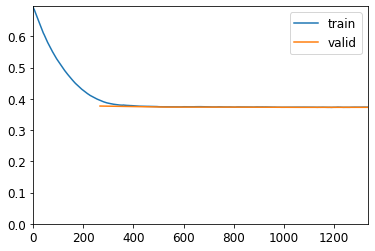

In [ ]:
learn.fit_one_cycle(5)

In [ ]:
#learn.export('drive/MyDrive/' + 'model.pkl')

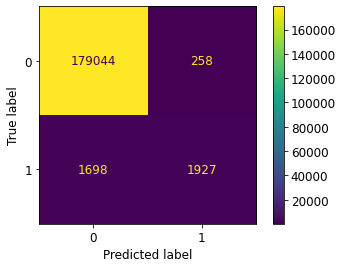

In [ ]:
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
x_val_nn, v_val_nn = to.valid.xs, to.valid.ys.values.ravel()
test_dl = learn.dls.test_dl(df_train_valid[:indexes[-1]+1])
predicted_df_nn, targs =  learn.get_preds(dl = test_dl)

predicted = get_predictions_int(predicted_df_nn)
plot_confusion_matrix(v_val_nn, predicted)

<Figure size 432x288 with 0 Axes>

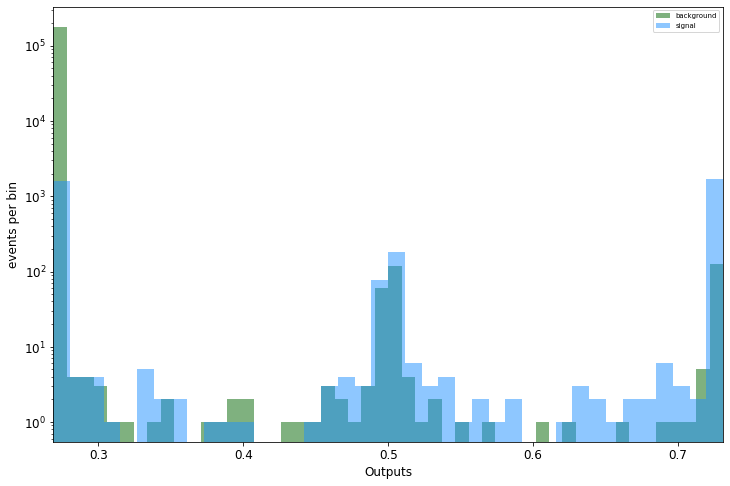

In [ ]:
probs = predicted_df_nn
preds = probs[:,1]

plot_signal_background(v_val_nn, preds)

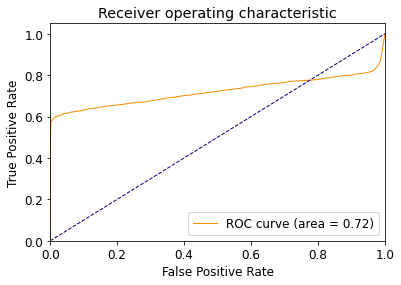

In [ ]:
plot_ROC_curve(v_val_nn, preds)

In [ ]:
print("Accuracy:",accuracy_score(v_val_nn, predicted))

Accuracy: 0.9893072099799374
